# A 18
## a)

In [7]:
import numpy as np


def f(x): 
    return x * np.cos(x)


def trapezsumme(start, stop, h_val):
    x_range = np.arange(start, stop + h_val, h_val)
    y_range = f(x_range)
    summe = np.sum(y_range[1:-1]) + (y_range[0] + y_range[-1]) / 2 
    return h_val * summe


def rechtecksum(start, stop, h_val):
    x_range = np.arange(start, stop + h_val, h_val)
    y_range = f(x_range)
    summe = np.sum(y_range[:-1])
    return h_val * summe
    

def mittelsumme(start, stop, h_val):
    x_range = np.arange(start, stop + h_val, h_val)
    y_range = f((x_range[1:] + x_range[:-1])/2)
    summe = np.sum(y_range[:-1])
    return h_val * summe



## b)

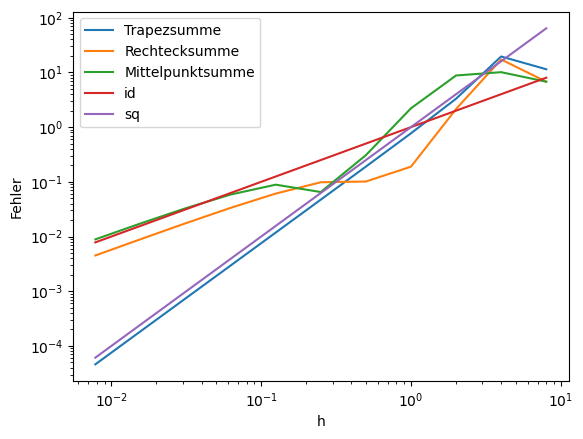

In [8]:
import numpy as np
import matplotlib.pyplot as plt


funcdict = {
    'Trapezsumme': np.vectorize(trapezsumme, excluded=[0,1]), 
    'Rechtecksumme': np.vectorize(rechtecksum, excluded=[0,1]), 
    'Mittelpunktsumme': np.vectorize(mittelsumme, excluded=[0,1])
    }

start = 0
stop = 8
ana_integral = stop * np.sin(stop) + np.cos(stop) - start * np.sin(start) - np.cos(start)
h_range = (stop - start) / 2 ** np.arange(0, 11)

fig, ax = plt.subplots()


for key in funcdict.keys():
    func0 = funcdict[key]
    error_range = abs(ana_integral - func0(start, stop, h_range))
    ax.loglog(h_range, error_range, label=key)
ax.loglog(h_range, h_range, label='id')
ax.loglog(h_range, h_range**2, label='sq')
ax.set(xlabel='h', ylabel='Fehler')
ax.legend()